/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.9598 - val_loss: 0.8369
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.5712 - val_loss: 0.6298
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4425 - val_loss: 0.5039
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4633 - val_loss: 0.4432
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2591 - val_loss: 0.4066
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3453 - val_loss: 0.3714
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3213 - val_loss: 0.3469
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2331 - val_loss: 0.3272
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2987 - val_loss: 0.3084
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2308 - val_loss: 0.2758
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1954 - val_loss: 0.2437
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2076 - val_loss: 0.2217


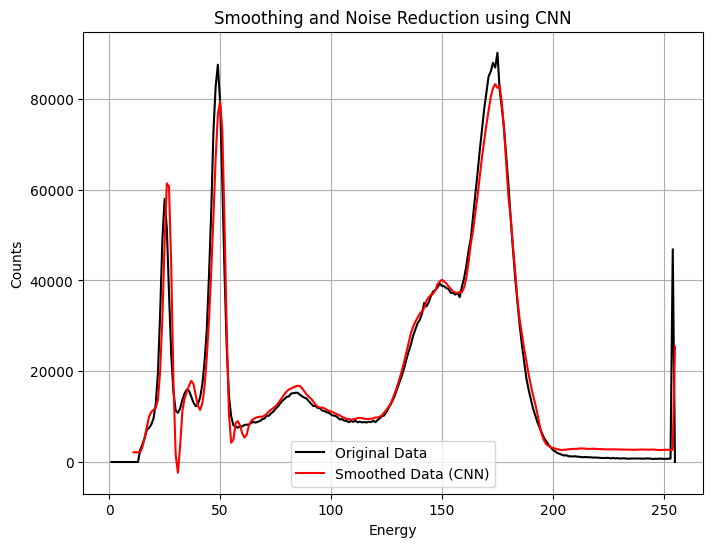

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('15.5.csv')
energy = data.iloc[:, 0].values
counts = data.iloc[:, 1].values

# Normalize the data
scaler = StandardScaler()
counts_scaled = scaler.fit_transform(counts.reshape(-1, 1)).flatten()

# Prepare the data for the Convolutional Neural Network (CNN)
def create_dataset(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_dataset(counts_scaled, window_size)
X = np.expand_dims(X, axis=2)  # For compatibility with Conv1D input

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Convolutional Neural Network (CNN) model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(window_size, 1)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions using the model
X_full, _ = create_dataset(counts_scaled, window_size)
X_full = np.expand_dims(X_full, axis=2)
predictions = model.predict(X_full).flatten()

# Rescale the predictions
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(energy, counts, label='Original Data', color='black')
plt.plot(energy[window_size:], predictions_rescaled, label='Smoothed Data (CNN)', color='red')
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.title('Smoothing and Noise Reduction using CNN')
plt.grid(True)
plt.show()
